# High speed gear dataset

Radial vibration measurements taken on 3MW wind turbine pinion gear. For the fault case (case 1) initial vibration readings showed high vibration levels, the machine was stopped after one week and fault on pinion gear found as shown in image below. Two other vibration readings (case 2 and 3) are given from pinion gears of different wind turbines of the same model with no known faults.
![pinonGear.jpg](pinonGear.jpg)

http://data-acoustics.com/?p=280

* Sample rate: 97656 Hz
* Record length: 6 seconds
* Unit: g
* Axis measured: Radial
* Sensor type: Accelerometer

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [16]:
def setup_file(filename):
    data = scipy.io.loadmat(filename)
    teeth = data["teeth"].item(0)
    sample_rate = data["sr"].item(0)
    accelerometer_gs = data["gs"][:,0]
    tach = data["tach"]
    periods_per_revolution = data["ppr"].item(0)

    gear_rpm = 1800
    gear_expected_hz = 1800/60
    gear_real_hz = tach.size/(8*tach[-1])
    teeth_hz = gear_real_hz * 32

    print("teeth:", teeth)
    print("sample_rate:", sample_rate)
    
    return {"sample_rate": sample_rate, 
            "accelerometer_gs": accelerometer_gs,
            "gear_hz": gear_real_hz,
            "teeth_hz": teeth_hz}


teeth: 32
sample_rate: 97656


<IPython.core.display.Javascript object>


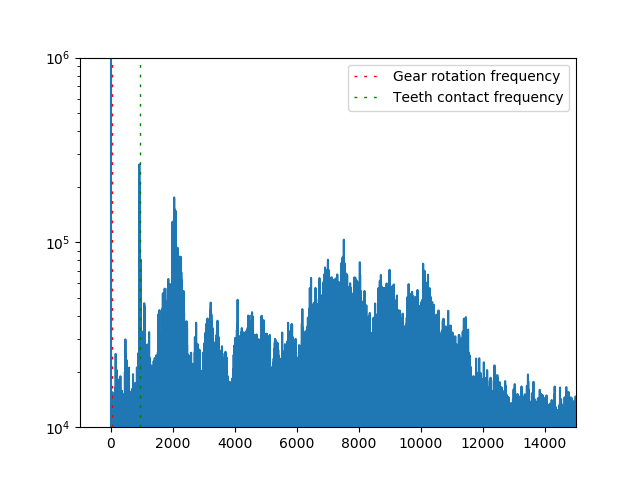

In [19]:
# data = setup_file("hs_gear_1_fault/case1_1.mat")
data = setup_file("hs_gear_2_3_good/case2_2.mat")

accelerometer_gs = data['accelerometer_gs']
sample_rate = data['sample_rate']
gear_hz = data['gear_hz']
teeth_hz = data['teeth_hz']

acc_mean = np.mean(accelerometer_gs)

sample_num = accelerometer_gs.size
time = sample_num/sample_rate

t = np.linspace(0, time, sample_num)

# acceleration_m_s2 = (accelerometer_gs-acc_mean) * 9.8
acceleration_m_s2 = (accelerometer_gs-1) * 9.8
velocity = np.cumsum(acceleration_m_s2)
location = np.cumsum(velocity)

fft_input = acceleration_m_s2

samples = fft_input.size
# samples = 10000

t = np.arange(samples)/sample_rate
fft_input = fft_input[:samples]

t_freq = np.fft.rfftfreq(samples, 1/sample_rate)

fft = np.fft.rfft(fft_input)

# plt.figure()
# plt.plot(t,fft_input)

plt.figure()
plt.semilogy()
plt.plot(t_freq, np.absolute(fft))
#plt.plot(t_freq, np.angle(fft))
plt.axvline(gear_hz, color='r', linestyle=(0,(2, 5)), linewidth=1, label='Gear rotation frequency')
plt.axvline(teeth_hz, color='g', linestyle=(0,(2, 5)), linewidth=1, label='Teeth contact frequency')

plt.xlim(-1000, 15000)
plt.ylim(1e4, 1e6)
plt.legend()